In [1]:
import json

In [2]:
with open("../sub_functions.json", 'r') as fp:
    grid_returning_map = json.load(fp)

In [3]:
import ast
import textwrap
from typing import Dict, Any, List, Tuple
import os
import importlib.util


In [4]:
def import_dsl_functions(dsl_file_path: str) -> Dict[str, Any]:
    spec = importlib.util.spec_from_file_location("dsl", dsl_file_path)
    dsl_module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(dsl_module)
    return {name: getattr(dsl_module, name) for name in dir(dsl_module) if not name.startswith('_')}

def execute_sub_function(sub_function_str: str, input_grid: Tuple[Tuple[int, ...], ...], dsl_functions: Dict[str, Any], constants: Dict[str, Any]) -> Tuple[Tuple[int, ...], ...]:
    # Parse the sub-function string
    sub_function_ast = ast.parse(sub_function_str).body[0].value

    def eval_node(node):
        if isinstance(node, ast.Call):
            func_name = node.func.id
            args = [eval_node(arg) for arg in node.args]
            return dsl_functions[func_name](*args)
        elif isinstance(node, ast.Name):
            if node.id == 'I':
                return input_grid
            elif node.id in constants:
                return constants[node.id]
            elif node.id in dsl_functions:
                return dsl_functions[node.id]
            else:
                raise NameError(f"Name '{node.id}' is not defined")
        elif isinstance(node, ast.Num):
            return node.n
        else:
            raise ValueError(f"Unsupported node type: {type(node)}")

    return eval_node(sub_function_ast)


In [5]:
dsl_functions = import_dsl_functions('dsl.py')

In [6]:
import sys

In [7]:
input_grid = (
        (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        (0, 0, 0, 0, 0, 8, 2, 8, 0, 0, 0, 0),
        (0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0),
        (0, 0, 0, 0, 0, 8, 2, 8, 0, 0, 0, 0),
        (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0),
        (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    )


In [8]:
def read_file(file_path: str) -> str:
    with open(file_path, 'r') as file:
        return file.read()
def parse_constants(code: str) -> Dict[str, Any]:
    tree = ast.parse(code)
    constants = {}
    for node in ast.walk(tree):
        if isinstance(node, ast.Assign):
            for target in node.targets:
                if isinstance(target, ast.Name) and target.id.isupper():
                    if isinstance(node.value, ast.Num):
                        constants[target.id] = node.value.n
                    elif isinstance(node.value, ast.UnaryOp) and isinstance(node.value.op, ast.USub):
                        # Handle negative numbers
                        constants[target.id] = -node.value.operand.n
                    elif isinstance(node.value, ast.Tuple):
                        constants[target.id] = tuple(
                            elt.n if isinstance(elt, ast.Num) 
                            else -elt.operand.n if isinstance(elt, ast.UnaryOp) and isinstance(elt.op, ast.USub)
                            else None 
                            for elt in node.value.elts
                        )
                    elif sys.version_info >= (3, 8) and isinstance(node.value, ast.Constant):
                        # Handle booleans and other constants in Python 3.8+
                        constants[target.id] = node.value.value
                    elif sys.version_info < (3, 8) and isinstance(node.value, ast.NameConstant):
                        # Handle booleans in Python 3.7 and earlier
                        constants[target.id] = node.value.value
    return constants



In [9]:
constants_code

NameError: name 'constants_code' is not defined

In [10]:
sub_function = grid_returning_map['solve_97a05b5b'][1]
constants_code = read_file('constants.py')
constants = parse_constants(constants_code)
# constants['F'] = False
# constants['T'] = True
# constants['NEG_ONE'] = -1
# constants['NEG_TWO'] = -2


In [11]:
sub_function

'paint(subgrid(argmax(objects(I, F, T, T), size), I), mapply(fork(mapply, compose(lbind(lbind, shift), normalize), fork(apply, chain(compose(lbind(rbind, subtract), ulcorner), fork(combine, compose(lbind(recolor, ZERO), rbind(sfilter, compose(flip, matcher(first, TWO)))), rbind(sfilter, matcher(first, TWO))), normalize), fork(sfilter, compose(rbind(sfilter, chain(compose(positive, size), lbind(sfilter, apply(toindices, objects(switch(subgrid(argmax(objects(I, F, T, T), size), I), TWO, ZERO), T, T, T))), lbind(lbind, contained))), chain(lbind(occurrences, switch(subgrid(argmax(objects(I, F, T, T), size), I), TWO, ZERO)), fork(combine, compose(lbind(recolor, ZERO), rbind(sfilter, compose(flip, matcher(first, TWO)))), rbind(sfilter, matcher(first, TWO))), normalize)), chain(rbind(compose, compose(chain(size, first, lbind(sfilter, apply(toindices, objects(switch(subgrid(argmax(objects(I, F, T, T), size), I), TWO, ZERO), T, T, T)))), lbind(lbind, contained))), lbind(rbind, equality), rbind(

In [12]:
def references_input_grid(func_def: ast.FunctionDef) -> bool:
    """
    Check if the function references the input grid 'I'.
    
    :param func_def: The AST node of the function definition
    :return: True if the function references 'I', False otherwise
    """
    class InputGridVisitor(ast.NodeVisitor):
        def __init__(self):
            self.references_i = False

        def visit_Name(self, node):
            if node.id == 'I':
                self.references_i = True
            self.generic_visit(node)

    visitor = InputGridVisitor()
    visitor.visit(func_def)
    return visitor.references_i


In [15]:
not_using = []
for k in grid_returning_map:
    for func in grid_returning_map[k]:
        parsed = ast.parse(func)
        if not references_input_grid(parsed):
            
            not_using.append(func)

In [16]:
not_using

['canvas(ZERO, astuple(FOUR, FOUR))',
 'canvas(ZERO, astuple(FOUR, FOUR))',
 'canvas(THREE, astuple(FOUR, FOUR))',
 'canvas(ZERO, astuple(SIX, SIX))',
 'canvas(ZERO, THREE_BY_THREE)',
 'canvas(ZERO, astuple(TEN, TEN))',
 'canvas(ZERO, THREE_BY_THREE)',
 'canvas(ZERO, astuple(SIX, FIVE))',
 'canvas(ZERO, THREE_BY_THREE)',
 'canvas(ZERO, THREE_BY_THREE)',
 'canvas(ZERO, astuple(ONE, NINE))',
 'canvas(ZERO, THREE_BY_THREE)',
 'canvas(ZERO, astuple(ONE, THREE))',
 'rot270(paint(canvas(ZERO, astuple(NINE, NINE)), combine(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO), shift(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO), shape(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO))))))',
 'paint(canvas(ZERO, astuple(NINE, NINE)), combine(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO), shift(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO), shape(upscale(upscale(initset(astuple(THREE, ORIGIN)), TWO), TWO)))))',
 'canvas(ZERO, astuple(NIN

In [12]:
constants

{'F': False,
 'T': True,
 'ZERO': 0,
 'ONE': 1,
 'TWO': 2,
 'THREE': 3,
 'FOUR': 4,
 'FIVE': 5,
 'SIX': 6,
 'SEVEN': 7,
 'EIGHT': 8,
 'NINE': 9,
 'TEN': 10,
 'NEG_ONE': -1,
 'NEG_TWO': -2,
 'DOWN': (1, 0),
 'RIGHT': (0, 1),
 'UP': (-1, 0),
 'LEFT': (0, -1),
 'ORIGIN': (0, 0),
 'UNITY': (1, 1),
 'NEG_UNITY': (-1, -1),
 'UP_RIGHT': (-1, 1),
 'DOWN_LEFT': (1, -1),
 'ZERO_BY_TWO': (0, 2),
 'TWO_BY_ZERO': (2, 0),
 'TWO_BY_TWO': (2, 2),
 'THREE_BY_THREE': (3, 3)}

In [13]:
result = execute_sub_function(sub_function, input_grid, dsl_functions, constants)


In [14]:
result

((2, 2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 0, 2, 2, 2, 2, 2),
 (2, 2, 0, 0, 0, 2, 2, 2, 2),
 (2, 2, 2, 0, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2, 2))

In [17]:
def plot_task(
    task: List[dict],
    title: str = None
) -> None:
    """
    displays a task
    """
    cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    height = 2
    width = len(task)
    figure_size = (width * 3, height * 3)
    figure, axes = plt.subplots(height, width, figsize=figure_size)
    if width > 1:
        for column, example in enumerate(task):
            axes[0, column].imshow(example['input'], **args)
            axes[1, column].imshow(example['output'], **args)
            axes[0, column].axis('off')
            axes[1, column].axis('off')
    else:
        example=task[0]
        axes[0].imshow(example['input'], **args)
        axes[1].imshow(example['output'], **args)
        axes[0].axis('off')
        axes[1].axis('off')
    if title is not None:
        figure.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


In [18]:
def get_data(train=True):
    path = f'arc_original/{"training" if train else "evaluation"}'
    data = {}
    for fn in os.listdir(path):
        with open(f'{path}/{fn}') as f:
            data[fn.rstrip('.json')] = json.load(f)
    ast = lambda g: tuple(tuple(r) for r in g)
    return {
        'train': {k: [{
            'input': ast(e['input']),
            'output': ast(e['output']),
        } for e in v['train']] for k, v in data.items()},
        'test': {k: [{
            'input': ast(e['input']),
            'output': ast(e['output']),
        } for e in v['test']] for k, v in data.items()}
    }


In [19]:
data = get_data()

In [31]:
for k in data['test']:
    if len(data['test'][k]) > 1:
        print(data['test'][k])

# print([len(data['test'][k]) for k in data['test']])

[{'input': ((2, 0, 2, 2, 0), (2, 0, 0, 2, 2), (2, 2, 2, 0, 0), (2, 2, 2, 2, 2), (0, 2, 2, 0, 0), (2, 2, 2, 2, 2), (4, 4, 4, 4, 4), (0, 0, 0, 2, 2), (2, 0, 0, 0, 2), (2, 2, 2, 0, 2), (0, 2, 2, 0, 0), (2, 0, 2, 2, 0), (2, 0, 2, 2, 2)), 'output': ((3, 0, 3, 0, 3), (0, 0, 0, 3, 0), (0, 0, 0, 0, 3), (3, 0, 0, 3, 3), (3, 3, 0, 3, 0), (0, 3, 0, 0, 0))}, {'input': ((2, 0, 2, 0, 2), (2, 0, 2, 0, 2), (0, 0, 0, 2, 0), (0, 2, 2, 2, 0), (2, 0, 2, 2, 0), (2, 2, 2, 0, 2), (4, 4, 4, 4, 4), (2, 2, 0, 0, 0), (0, 2, 2, 2, 2), (0, 0, 2, 2, 0), (0, 2, 0, 0, 0), (0, 2, 2, 0, 2), (2, 0, 0, 0, 0)), 'output': ((0, 3, 3, 0, 3), (3, 3, 0, 3, 0), (0, 0, 3, 0, 0), (0, 0, 3, 3, 0), (3, 3, 0, 3, 3), (0, 3, 3, 0, 3))}]
[{'input': ((0, 0, 0, 2, 2, 0), (2, 2, 0, 2, 2, 0), (2, 2, 0, 0, 0, 0), (0, 0, 2, 2, 0, 0), (0, 0, 2, 2, 0, 0), (0, 0, 0, 0, 0, 0)), 'output': ((1, 0, 1), (0, 1, 0), (0, 0, 0))}, {'input': ((0, 0, 0, 0, 0, 0, 0), (2, 2, 0, 2, 2, 0, 0), (2, 2, 0, 2, 2, 0, 0), (0, 0, 0, 0, 0, 2, 2), (0, 0, 2, 2, 0, 2, 2)

In [20]:
data['train']['9aec4887']

[{'input': ((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 8, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)),
  'output': ((0, 4, 4, 4, 4, 0),
   (2, 8, 0, 0, 8, 1),
   (2, 0, 8, 0, 1, 1),
   (2, 2, 8, 8, 1, 1),
   (2, 0, 3, 0, 8, 1),
   (0, 3, 3, 3, 3, 0))},
 {'input': ((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

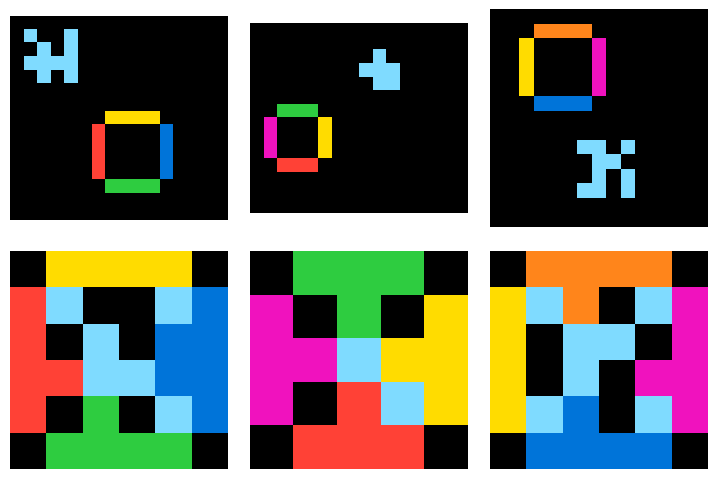

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

plot_task(data['train']['9aec4887'], "")

In [22]:
import numpy as np

In [23]:
random_10 = np.random.choice(list(grid_returning_map.keys()), size=10, replace=False).tolist()

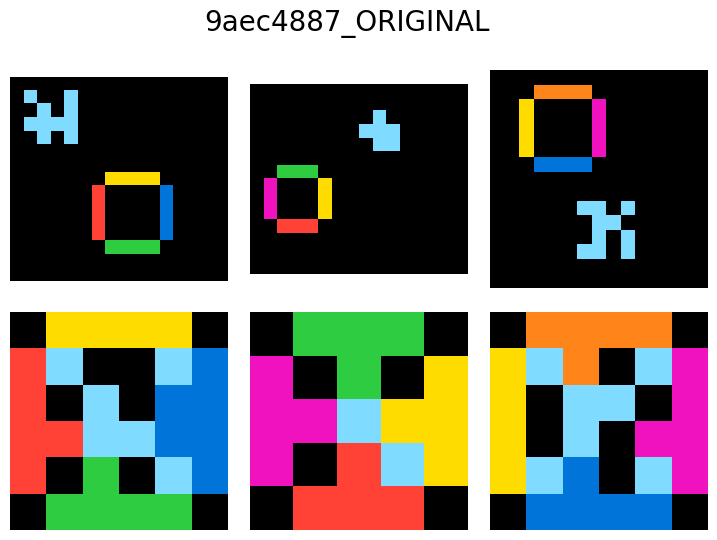

paint(subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I), apply(fork(astuple, chain(first, lbind(argmin, normalize(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)))), chain(rbind(compose, initset), lbind(rbind, manhattan), initset)), identity), toindices(shift(normalize(argmin(objects(I, F, T, T), numcolors)), UNITY))))
paint(subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I), apply(fork(astuple, chain(first, lbind(argmin, normalize(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)))), chain(rbind(compose, initset), lbind(rbind, manhattan), initset)), identity), toindices(shift(normalize(argmin(objects(I, F, T, T), numcolors)), UNITY))))
paint(subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I), apply(fork(astuple, chain(first, lbind(argmin, normalize(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)))), chain(rbind(compose, initset), lbind(rbind, manhatt

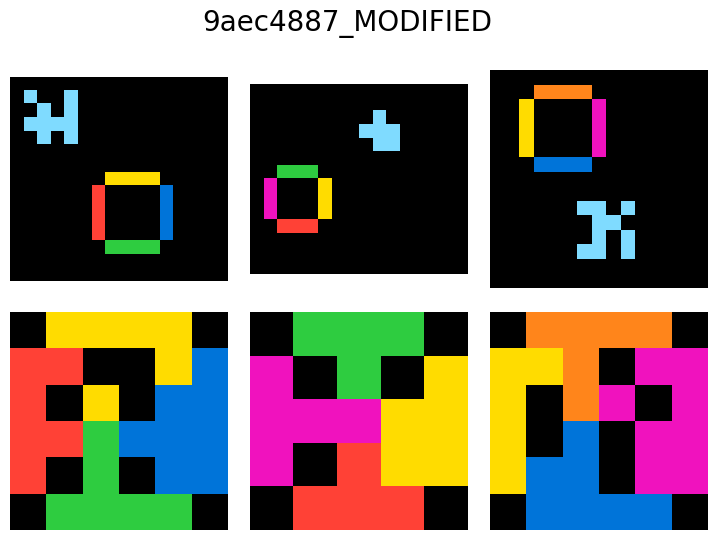

subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I)
subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I)
subgrid(other(objects(I, F, T, T), argmin(objects(I, F, T, T), numcolors)), I)


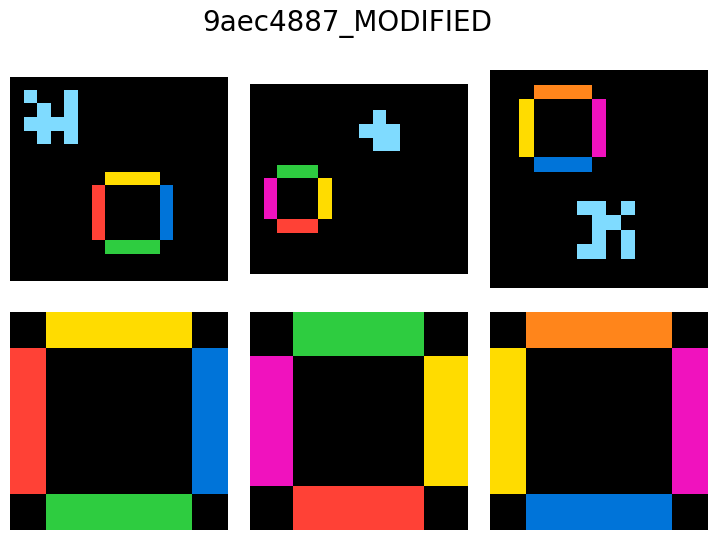

In [20]:
# for func_name in random_10:
for func_name in ["solve_9aec4887"]:
    # try:
    key = func_name.replace("solve_", '')
    orig_examples = data['train'][key]
    # sub_func = np.random.choice(grid_returning_map[func_name], size=1, replace=False).tolist()[0]
    
    plot_task(orig_examples, key + "_ORIGINAL")
    for sub_func in grid_returning_map[func_name]:
        
        modified_examples = []
        for ex in orig_examples:
            input_grid = ex['input']
            result = execute_sub_function(sub_func, input_grid, dsl_functions, constants)
            if result != ex['output']:
                print(sub_func)
                modified_examples.append({"input":input_grid,"output":result})
        if len(modified_examples) > 0:
            plot_task(modified_examples, key + "_MODIFIED")

    
    
    # except:
    #     continue
    
    

In [40]:
# for func_name in random_10:
incremental_examples = {}
incremental_examples['train'] = {}
incremental_examples['test'] = {}
solution_programs = {}
def func_from_template(key, func):
    return f"def solve_{key}(I):\n\n\treturn{func}\n"
    
for func_name in grid_returning_map:
    # try:
    key = func_name.replace("solve_", '')
    orig_examples = data['train'][key]
    test_examples = data['test'][key]
    # sub_func = np.random.choice(grid_returning_map[func_name], size=1, replace=False).tolist()[0]
    
    # plot_task(orig_examples, key + "_ORIGINAL")
    curr_idx = 0
    for sub_func in grid_returning_map[func_name]:
        new_func_key = f"{key}_{curr_idx}"
        parsed = ast.parse(sub_func)
        if references_input_grid(parsed):

            modified_examples = []
            for ex in orig_examples:
                input_grid = ex['input']
                result = execute_sub_function(sub_func, input_grid, dsl_functions, constants)
                if result != ex['output']:
                    # print(sub_func)
                    modified_examples.append({"input":input_grid,"output":result})

            modified_tests = []
            for test_ex in test_examples:
                test_input = test_ex['input']
                modified_output = execute_sub_function(sub_func, test_input, dsl_functions, constants)
                modified_tests.append({'input': test_input, 'output':modified_output})
                
            if len(modified_examples) > 0 and len(modified_tests) > 0:
                # test_input = test_example['input']
                # modified_output = execute_sub_function(sub_func, test_input, dsl_functions, constants)
    
                incremental_examples['train'][new_func_key] = modified_examples
                incremental_examples['test'][new_func_key] = modified_tests
                solution_programs[new_func_key] = sub_func
                curr_idx += 1
            
            # plot_task(modified_examples, key + "_MODIFIED")
            

    
    
    # except:
    #     continue
    
    

In [54]:
with open("incremental_arc_examples.json", 'w') as fp:
    json.dump(incremental_examples, fp)

In [60]:
with open("incremental_arc_solutions.json", 'w') as fp:
    json.dump(solution_programs, fp)

In [41]:
len(incremental_examples['train'])

1349

In [55]:
incremental_examples['test'].keys()

dict_keys(['5614dbcf_0', 'f25ffba3_0', 'f25ffba3_1', '28bf18c6_0', '28bf18c6_1', '3af2c5a8_0', '3af2c5a8_1', '62c24649_0', '62c24649_1', '67e8384a_0', '67e8384a_1', '7468f01a_0', '46f33fce_0', '46f33fce_1', '46f33fce_2', 'a740d043_0', 'a79310a0_0', 'aabf363d_0', 'aabf363d_1', 'f25fbde4_0', '1e0a9b12_0', '0d3d703e_0', '0d3d703e_1', '0d3d703e_2', '1c786137_0', '2013d3e2_0', '2013d3e2_1', '9565186b_0', 'e98196ab_0', 'e98196ab_1', 'f76d97a5_0', 'ce9e57f2_0', '9f236235_0', '46442a0e_0', '46442a0e_1', '46442a0e_2', '46442a0e_3', '46442a0e_4', '7fe24cdd_0', '7fe24cdd_1', '7fe24cdd_2', '7fe24cdd_3', '7fe24cdd_4', '0ca9ddb6_0', '543a7ed5_0', '0520fde7_0', '0520fde7_1', '0520fde7_2', 'dae9d2b5_0', 'dae9d2b5_1', 'dae9d2b5_2', '8d5021e8_0', '8d5021e8_1', '8d5021e8_2', '8d5021e8_3', '8d5021e8_4', '928ad970_0', '928ad970_1', 'b60334d2_0', 'b60334d2_1', 'b94a9452_0', 'b94a9452_1', 'b94a9452_2', 'd0f5fe59_0', 'e3497940_0', 'e3497940_1', 'e9afcf9a_0', 'e9afcf9a_1', 'e9afcf9a_2', 'e9afcf9a_3', 'e9afcf9a

In [53]:
solution_programs

{'5614dbcf_0': 'replace(I, FIVE, ZERO)',
 'f25ffba3_0': 'bottomhalf(I)',
 'f25ffba3_1': 'bottomhalf(I)',
 '28bf18c6_0': 'subgrid(first(objects(I, T, T, T)), I)',
 '28bf18c6_1': 'subgrid(first(objects(I, T, T, T)), I)',
 '3af2c5a8_0': 'hconcat(I, vmirror(I))',
 '3af2c5a8_1': 'hconcat(I, vmirror(I))',
 '62c24649_0': 'hconcat(I, vmirror(I))',
 '62c24649_1': 'hconcat(I, vmirror(I))',
 '67e8384a_0': 'hconcat(I, vmirror(I))',
 '67e8384a_1': 'hconcat(I, vmirror(I))',
 '7468f01a_0': 'subgrid(first(objects(I, F, T, T)), I)',
 '46f33fce_0': 'rot180(downscale(rot180(I), TWO))',
 '46f33fce_1': 'downscale(rot180(I), TWO)',
 '46f33fce_2': 'rot180(I)',
 'a740d043_0': 'subgrid(merge(objects(I, T, T, T)), I)',
 'a79310a0_0': 'move(I, first(objects(I, T, F, T)), DOWN)',
 'aabf363d_0': 'replace(I, leastcolor(I), ZERO)',
 'aabf363d_1': 'replace(I, leastcolor(I), ZERO)',
 'f25fbde4_0': 'subgrid(first(objects(I, T, T, T)), I)',
 '1e0a9b12_0': 'rot270(I)',
 '0d3d703e_0': 'switch(switch(switch(I, THREE, FOUR)

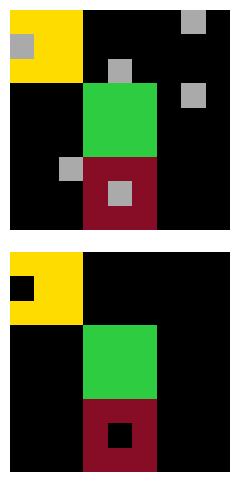

In [59]:
plot_task(incremental_examples['test']['5614dbcf_0'], '')

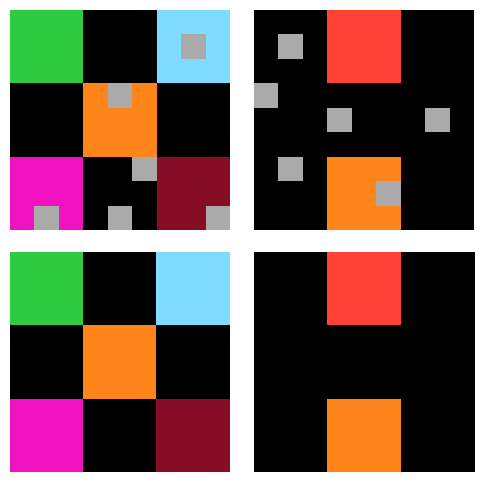

In [58]:
plot_task(data['train']['5614dbcf'], '')

In [47]:
incremental_examples['train']['5614dbcf_0']

[{'input': ((3, 3, 3, 0, 0, 0, 8, 8, 8),
   (3, 3, 3, 0, 0, 0, 8, 5, 8),
   (3, 3, 3, 0, 0, 0, 8, 8, 8),
   (0, 0, 0, 7, 5, 7, 0, 0, 0),
   (0, 0, 0, 7, 7, 7, 0, 0, 0),
   (0, 0, 0, 7, 7, 7, 0, 0, 0),
   (6, 6, 6, 0, 0, 5, 9, 9, 9),
   (6, 6, 6, 0, 0, 0, 9, 9, 9),
   (6, 5, 6, 0, 5, 0, 9, 9, 5)),
  'output': ((3, 3, 3, 0, 0, 0, 8, 8, 8),
   (3, 3, 3, 0, 0, 0, 8, 0, 8),
   (3, 3, 3, 0, 0, 0, 8, 8, 8),
   (0, 0, 0, 7, 0, 7, 0, 0, 0),
   (0, 0, 0, 7, 7, 7, 0, 0, 0),
   (0, 0, 0, 7, 7, 7, 0, 0, 0),
   (6, 6, 6, 0, 0, 0, 9, 9, 9),
   (6, 6, 6, 0, 0, 0, 9, 9, 9),
   (6, 0, 6, 0, 0, 0, 9, 9, 0))},
 {'input': ((0, 0, 0, 2, 2, 2, 0, 0, 0),
   (0, 5, 0, 2, 2, 2, 0, 0, 0),
   (0, 0, 0, 2, 2, 2, 0, 0, 0),
   (5, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 5, 0, 0, 0, 5, 0),
   (0, 0, 0, 0, 0, 0, 0, 0, 0),
   (0, 5, 0, 7, 7, 7, 0, 0, 0),
   (0, 0, 0, 7, 7, 5, 0, 0, 0),
   (0, 0, 0, 7, 7, 7, 0, 0, 0)),
  'output': ((0, 0, 0, 2, 2, 2, 0, 0, 0),
   (0, 0, 0, 2, 2, 2, 0, 0, 0),
   (0, 0, 0, 2, 2, 2, 0, 0, 0)

In [62]:
contained = []
for func_name in random_10:
    key = func_name.replace("solve_", '')
    for sub_func1 in grid_returning_map[func_name]:
        for sub_func2 in grid_returning_map[func_name]:
            if sub_func1 != sub_func2 and len(sub_func1) < len(sub_func2):
                if sub_func1 in sub_func2:
                    contained.append((key, sub_func1, sub_func2))
                    

In [63]:
contained

[('99fa7670',
  'paint(I, mapply(fork(recolor, color, compose(rbind(shoot, RIGHT), center)), objects(I, T, F, T)))',
  'underpaint(paint(I, mapply(fork(recolor, color, compose(rbind(shoot, RIGHT), center)), objects(I, T, F, T))), mapply(fork(recolor, compose(color, first), fork(connect, compose(lrcorner, first), compose(lrcorner, last))), pair(remove(recolor(ZERO, initset(add(shape(I), DOWN_LEFT))), order(insert(recolor(ZERO, initset(add(shape(I), DOWN_LEFT))), objects(paint(I, mapply(fork(recolor, color, compose(rbind(shoot, RIGHT), center)), objects(I, T, F, T))), T, F, T)), uppermost)), remove(first(order(insert(recolor(ZERO, initset(add(shape(I), DOWN_LEFT))), objects(paint(I, mapply(fork(recolor, color, compose(rbind(shoot, RIGHT), center)), objects(I, T, F, T))), T, F, T)), uppermost)), order(insert(recolor(ZERO, initset(add(shape(I), DOWN_LEFT))), objects(paint(I, mapply(fork(recolor, color, compose(rbind(shoot, RIGHT), center)), objects(I, T, F, T))), T, F, T)), uppermost)))))'